In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
student_dataset = pd.read_csv('/content/student-mat (1).xls')

In [141]:
student_dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [142]:
student_dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [143]:
student_dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

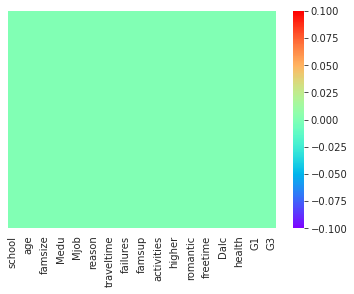

In [144]:
sns.heatmap(student_dataset.isnull(),cmap="rainbow",yticklabels=False)

In [145]:
female_student = len(student_dataset[student_dataset['sex'] == 'F'])
print('Number of female students:',female_student)
male_student = len(student_dataset[student_dataset['sex'] == 'M'])
print('Number of male students:',male_student)

Number of female students: 208
Number of male students: 187


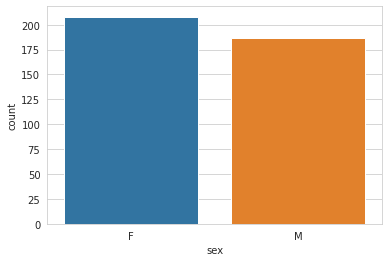

In [146]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='sex',data=student_dataset)

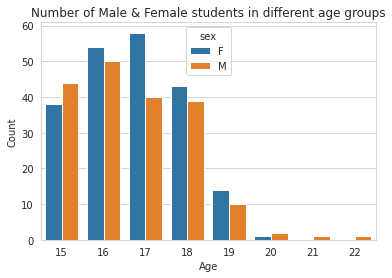

In [147]:
student_sex = sns.countplot(x='age',hue='sex', data=student_dataset)
student_sex.axes.set_title('Number of Male & Female students in different age groups')
student_sex.set_xlabel("Age")
student_sex.set_ylabel("Count")
plt.show()

In [148]:
urban_student = len(student_dataset[student_dataset['address'] == 'U'])    # Number of urban areas students
print('Number of Urban students:',urban_student)
rural_student = len(student_dataset[student_dataset['address'] == 'R'])    # Number of rural areas students
print('Number of Rural students:',rural_student)

Number of Urban students: 307
Number of Rural students: 88


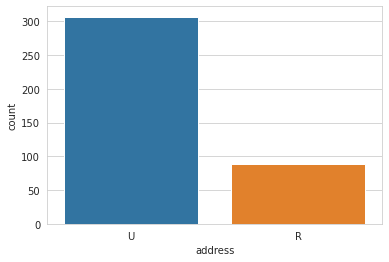

In [149]:
sns.countplot(x='address',data=student_dataset) 

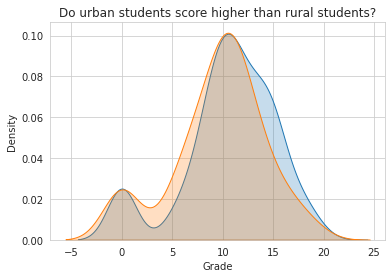

In [150]:
sns.kdeplot(student_dataset.loc[student_dataset['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(student_dataset.loc[student_dataset['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

In [151]:
student_dataset.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

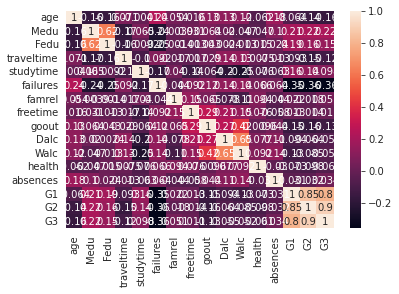

In [152]:
sns.heatmap(student_dataset.corr(), annot=True)

In [153]:
student_dataset=student_dataset.drop(["school", "famsize","address", "Mjob", "Fjob", "reason"], axis=1)

In [154]:
student_dataset.head()

,sex,age,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,A,4,4,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,T,1,1,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,T,1,1,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,T,4,2,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,T,3,3,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [155]:
student_dataset.columns

Index(['sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Encoding categorical variables using LabelEncoder()

In [156]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
student_dataset.iloc[:, 0] = labelencoder.fit_transform(student_dataset.iloc[:, 0].values)
student_dataset.iloc[:, 2] = labelencoder.fit_transform(student_dataset.iloc[:, 2].values)
student_dataset.iloc[:, 5] = labelencoder.fit_transform(student_dataset.iloc[:, 5].values)
student_dataset.iloc[:, 9] = labelencoder.fit_transform(student_dataset.iloc[:, 9].values)
student_dataset.iloc[:, 10] = labelencoder.fit_transform(student_dataset.iloc[:, 10].values)
student_dataset.iloc[:, 11] = labelencoder.fit_transform(student_dataset.iloc[:, 11].values)
student_dataset.iloc[:, 12] = labelencoder.fit_transform(student_dataset.iloc[:, 12].values)
student_dataset.iloc[:, 13] = labelencoder.fit_transform(student_dataset.iloc[:, 13].values)
student_dataset.iloc[:, 14] = labelencoder.fit_transform(student_dataset.iloc[:, 14].values)
student_dataset.iloc[:, 15] = labelencoder.fit_transform(student_dataset.iloc[:, 15].values)
student_dataset.iloc[:, 16] = labelencoder.fit_transform(student_dataset.iloc[:, 16].values)
student_dataset.iloc[:, 17] = labelencoder.fit_transform(student_dataset.iloc[:, 17].values)

In [157]:
student_dataset.head()

,sex,age,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,4,4,1,2,2,0,1,0,0,0,1,1,0,0,3,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,0,1,2,0,0,1,0,0,0,1,1,0,4,3,3,1,1,3,4,5,5,6
2,0,15,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,3,3,2,2,3,3,10,7,8,10
3,0,15,1,4,2,1,1,3,0,0,1,1,1,1,1,1,1,2,2,2,1,1,5,2,15,14,15
4,0,16,1,3,3,0,1,2,0,0,1,1,0,1,1,0,0,3,3,2,1,2,5,4,6,10,10


In [158]:
student_dataset.dtypes

sex           int64
age           int64
Pstatus       int64
Medu          int64
Fedu          int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [159]:
X = student_dataset.drop(['G3','G2','G1'], axis=1)
Y = student_dataset['G3']

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [161]:
from sklearn.metrics import accuracy_score
from sklearn import metrics as ms

Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
Linear_reg = LinearRegression()

In [163]:
Linear_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
Linear_reg_pred = Linear_reg.predict(X_test)

In [165]:
Linear_reg_mae = np.mean(abs(Linear_reg_pred - Y_test))
print(mae)
Linear_reg_rmse = np.sqrt(np.mean((Linear_reg_pred - Y_test) ** 2))
print(rmse)

3.519674096500767
4.681810626713314


Decision Tree Classifier

In [166]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [167]:
decisiontree_pred = decisiontree.predict(X_test)


In [168]:
decisiontree_mae = np.mean(abs(decisiontree_pred - Y_test))
print(mae)
decisiontree_rmse = np.sqrt(np.mean((decisiontree_pred - Y_test) ** 2))
print(rmse)

3.519674096500767
4.681810626713314


KNeighbors Classifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [171]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [172]:
neigh_pred = neigh.predict(X_test)

In [173]:
neigh_mae = np.mean(abs(neigh_pred - Y_test))
print(mae)
neigh_rmse = np.sqrt(np.mean((neigh_pred - Y_test) ** 2))
print(rmse)

3.519674096500767
4.681810626713314


Gradient Boosting Regressor

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [175]:
GBR.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [176]:
GBR_pred = GBR.predict(X_test)

In [177]:
GBR_mae = np.mean(abs(GBR_pred - Y_test))
print(mae)
GBR_rmse = np.sqrt(np.mean((GBR_pred - Y_test) ** 2))
print(rmse)

3.519674096500767
4.681810626713314


In [178]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree Classifier', 'KNeighbors Classifier', 'Gradient Boosting Regressor'],
    'MAE': [Linear_reg_mae, decisiontree_mae, neigh_mae, GBR_mae],
    'RMSE': [Linear_reg_rmse, decisiontree_rmse, neigh_rmse, GBR_rmse]})
result_df = results.sort_values(by='MAE', ascending=True)
result_df.head()

,Model,MAE,RMSE
3,Gradient Boosting Regressor,3.506670,4.666686
0,Linear Regression,3.717933,4.685209
1,Decision Tree Classifier,4.025316,5.582522
2,KNeighbors Classifier,4.696203,6.582485
